# Big Data Infrastructure Projekt

### GitHub: https://github.com/wi22b085/big-data

## Zusammenhang zwischen positiven Covid19-Testungen und Impfungen

In diesem Big Data Infrastructure-Projekt geht es darum  die Anzahl der positiven Testungen sowie die Impfungen in Österreich bzw. in den jeweiligen Bundesländern/Gemeinden zu analysieren, zu visualisieren und miteinander in Zusammenhang zu setzen. 

In diesem Jupiter-Notebook werden alle relevanten Schritte (sowie Erklärungen dazu) dokumentiert.

## Neo4J

Neo4J ist eine NoSQL-Graph-Database. Sie wurde aus folgenden Gründen für dieses Projekt gewählt:

- Flexibilität
- ACID-Transaktionen werden unterstützt
- Daten sind eng miteinander verbunden
- Einfache Darstellung der Daten

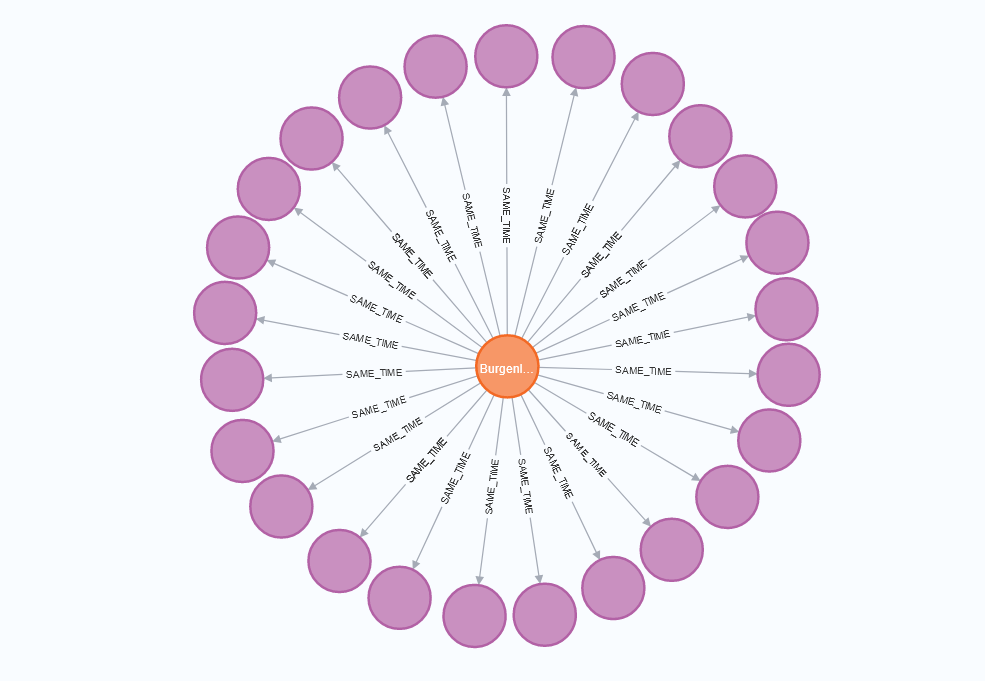

Die Testungen von Burgenland sind über Edges mit den Impfungen der Bezirke des gleichen Jahres verbunden.

## Projekt-Infrastruktur

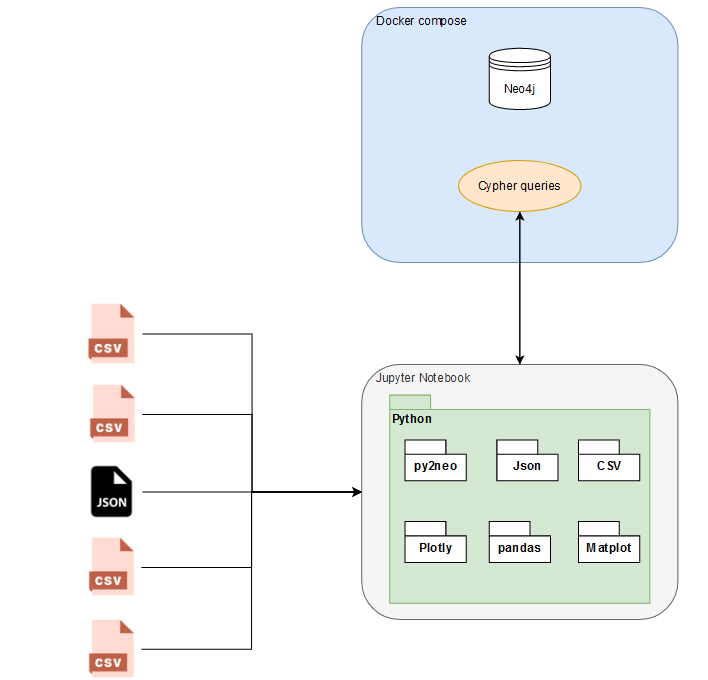

# Big Data Criteria

## 5 V's

### Volume:

- Fallen die Daten in großen Mengen an?

Es ist wichtig anzumerken, dass die Größe der Datenmenge relativ ist. Dennoch fallen in diesem Projekt eindeutig keine großen Datenmengen an. Daher ist dieser Punkt hier wenig Big-Data-relevant. Die Daten wurden zu Übungszwecken in der NoSQL-Graph-Database "Neo4J" gespeichert.

Alle in Neo4J gespeicherten Daten haben eine gemeinsame Größe von:
- ~ 13 000 Datensätzen
- ~ 900 KB

### Velocity:

- Fallen die Daten in einer großen Geschwindigkeit an?
- In welcher Geschwindigkeit werden die Daten verarbeitet?

Da in diesem Projekt keine neuen Daten anfallen und sie auch nur einmalig verarbeitet werden, ist Velocity hier wenig relevant.

Neo4J speichert die eigentlichen Daten auf der Festplatte. Jedoch lädt Neo4J Daten in den Arbeitsspeicher, um sie schneller verarbeiten zu können. In diesem Projekt wird nur Batch processing angewandt. Die Daten werden batchweise eingelesen, verarbeitet, in die Datenbank geladen und analysiert.

Lese-Zeit für ~ 900 KB:
- HDD: ~ 0,009 Sekunden bei 100 MB/s
- SSD: ~ 0,002 Sekunden bei 450 MB/s

Transfer-Zeit über Netzwertk für ~ 900 KB:
- ~ 0,009 Sekunden bei 100 MB/s

### Variety:

- Fallen die Daten in Großer Vielfalt an (Datentyp, Datenstruktur)?

Die Daten sind vom TYP CSV und strukturiert. Daher sind sie auch vollständig und folgen einem klaren Schema. Die Daten könnten daher auch in einer relationalen Datenbank mit Reihen und Spalten gespeichert werden.

### Veracity:

- Sind die daten von hoher Qualität (Glaubwürdigkeit, Gültigkeit, Wahrhaftigkeit)?

Alle Daten dieses Projekts stammen aus glaubwürdigen Quellen:
- https://info.gesundheitsministerium.at/
- https://www.data.gv.at/

Zusätzlich wurden die Daten auf Unstimmigkeiten (Ausreißer, Widersprüche, Fehlende Werte) geprüft. Hierfür wurde manuell vorgegangen und Python-Funktionen der Pandas-Library genutzt. Zusätzlich wurden die Ergebnisse mit anderen Quellen verglichen. Ein weiterer guter Indikator ist, dass die Impfzahlen für einen Ort nie kleiner sind als aus einem vorherigen Jahr. Aus diesen Gründen kann davon ausgegangen werden, dass die Daten von hoher Qualität sind.

### Value:

Die Analyse von Test- und Impfdaten kann wertvolle Einblicke liefern, um die Wirksamkeit verschiedener Strategien zu prüfen. Konnten Impfkampagnen in bestimmten Bundesländern bzw. in Österreich insagesamt zur Bekämpfung der Pandemie beitragen? Gibt es Dinge, die man in ähnlichen Situationen in der Zukunft besser machen kann?

Zudem bietet die Art der Darstellung die Möglichkeit, große Datensätze vereinfacht darzustellen. Einerseits kann der Bevölkerung so besser und ansehnlicher die Daten zu Verfügung gestellt werden und andererseits erleichtern die visuelle Darstellungen auch die Dateninterpretation. Außerdem befähigen sie das Entdecken von Trends oder Anomalien und unterstützen strategische Entscheidungen der Zukunft. Daher kann die Verarbeitung und Aufbereitung von Daten bezüglich Impfungen und Infektionen im Zuge einer Pandemie aus Big Data Sicht einen großen Vorteil bieten.

Die genutzten Daten haben einen großen Mehrwert. Durch ihre Analyse wird ein möglicher Zusammenhang zwischen den positiven Covid19-Testungen und den Impfungen festgestellt.

## 4 Levels of Data Processing

### Data Sources (Data Source Layer):

Für dieses Projekt sind keine Tools zur Datengewinnung notwendig. Die Daten wurden einmalig aus Quellen des Internets lokal abgespeichert.

Daten:
- Typ: Strukturiert
- Velocity und Volume: Die Daten fallen einamlig in geringer Menge an
- Externe Datenquelle: https://info.gesundheitsministerium.at/ und https://www.data.gv.at/
- Daten-Typ: CSV

### Data Messaging and Store Layer (Data Storage Layer):

Die Daten wurden über Docker in der NoSQL-Graph-Database "Neo4J" gespeichert. Noch vorher werden die Daten geringfügig transformie
rt (Sonderzeichen entfernt). Daher wird der ETL (Extract, Transform, Load)-Ansatz verfolgt.

CAP:
- Consistency: Neo4J bietet ACID-Transaktionen
- Availability: Noe4J bietet Mechanismen für teilweisen Systemausfall
- Partition Tolerance: Wenig relevant, da die Datenbank nur auf einem System ist

### Analysis Layer (Processing Layer):

Die Daten wurden mit verschiedenen Pandas Funktionen analysiert. Zudem wurde eine MapReduce-Calculation durchgeführt. Hiefür wurde ausschließlich Python genutzt.

### Consumption Layer (Data Output Layer):

Die Ergebnisse der Analyse und deren Value wurden mithilfe von Visualisierungen dargestellt. Hierzu wurde die Python-Libraries "Matplotlib" verwendet.

Folgende Diagrammtypen wurden eingesetzt:
- Barplots
- Kreisdiagramme
- Streudiagramme
- Choroplethenkarten mit 2 zusätlichen JSON-Files als Datenquelle

Es wurden außerdem die Datenbank-Visualisierungen von Neo4J genutzt.

Zielgruppe der Visualisierungen:
- Fachkolleg*innen

In diesem Projekt wurden teilweise Ergebnisse zurück in das System gespeist. Beispielsweise wurden Ergebnisse der MapReduce-Calculation abgespeichert, damit sie in einem weiteren Schritt zusammengefügt und zur Erstellung eines Diagramms genutzt werden konnten.

# Data Source and Storage

Zuerst wird ein Docker Container erstellt. Dieser enthällt einen Container, ein neo4j Image, auf welches durch die Ports 7474 und 7687 zugegriffen.Der Service ist durch ein Benutzername/Passwort-Paar ('neo4j/aveQho9yf6tx29vgW3kv') geschützt, das über Umgebungsvariablen konfiguriert ist.Es wird auch ein Volume erstellt womit man die Daten nicht erneut einlesen muss:

Dieses File wird dann gestartet:

In [ ]:
!docker-compose -p project_neo4j up -d

Um Neo4j zu verwenden, müssen Sie es und seinen Python-Treiber installieren. Darüber hinaus erleichtert die Installation der Bibliothek py2neo die Verbindungen und Interaktionen mit der Neo4j-Datenbank.

In [ ]:
pip install neo4j

In [ ]:
pip install py2neo

In [ ]:
pip install requests

In [ ]:
pip install matplotlib

In [ ]:
pip install plotly

In [ ]:
pip install nbformat>=4.20

Die folgende Python-Version wurde genutzt:

In [ ]:
import sys
print(sys.version)

Um die restlichen Komponenten aufzulisten wurde die Library "pkg_resouces" genutzt:

In [ ]:
import pkg_resources
for d in pkg_resources.working_set:
    print(d.project_name, d.version)

Pandas, CSV, Requests und verschiedene Modules von Py2Neo werden importiert:

In [ ]:
from py2neo import Graph, Node, Relationship
import csv
import pandas as pd
import requests

Die benötigten CSV-Dateien werden mithilfe von pdf.read_csv eingelesen.
Ingesamt gibt es vier CSV-Dateien. Drei davon enthalten Informationen über die Impfungen für die Jahre 2021, 2022 und 2023. Die vierte Datei gibt Information über die Testungen pro Bundesland in den Jahren 2021 bis Ende 2022.  

In [ ]:
faelle = pd.read_csv('timeline-faelle-bundeslaender.csv',delimiter=';')
vaccines_2021_cumulated = pd.read_csv('impfungen_2021.csv',delimiter=';')
vaccines_2022_cumulated = pd.read_csv('impfungen_2022.csv',delimiter=';')
vaccines_2023_cumulated = pd.read_csv('impfungen_2023.csv',delimiter=';')

Im folgenden ein paar allgemeine Informationen über Struktur und Inhalt der CSV-Dateien.

Alle genutzten CSV-Files verfügen über folgende Metadaten:
- Spaltenüberschriften
- Dateiformat
- Dateiname
- Dateigröße
- Erstellungsdatum
- Letzte Änderungsdatum
- Semikolons als Trennzeichen

In [ ]:
faelle.head()

In [ ]:
faelle.tail()

In [ ]:
vaccines_2021_cumulated.head()

In [ ]:
vaccines_2022_cumulated.head()

In [ ]:
vaccines_2023_cumulated.head()

In [ ]:
vaccines_2021_cumulated.tail()

In [ ]:
vaccines_2022_cumulated.tail()

In [ ]:
vaccines_2023_cumulated.tail()

In [ ]:
faelle.shape

In [ ]:
vaccines_2021_cumulated.shape

In [ ]:
vaccines_2022_cumulated.shape

In [ ]:
vaccines_2023_cumulated.shape

Wie unten ersichtlich, besteht der Datensatz aus einem Datum, welches aus dem jahr besteht, der BundeslandID, dem Namen des jeweiligen Bundesland sowie der Anzahl der durchgeführten Coronatests. Diese werden dann wieder aufgeteilt in PCR- und Antigentests.Zuletzt werden auch noch die positiven Fälle angezeigt.

In [ ]:
faelle.columns.tolist()

Die Impfungsdatensätze von 2021 bestehen, wie aus der Form ersichtlich ist, aus 8 Spalten. Diese beinhalten, wie oben erwähnt, das Datum als Jahr dargestellt, die ID der Gemeinde (diese sind nach der ersten Zahl auch dem jeweiligen Bundesland zuzuordnen), den Namen der Gemeinde, die Bevölkerung und dann die Anzahl der Personen, die die jeweilige Impfungsanzahl erhalten haben (Teilimmunisierte 1. Impfung, Vollimmunisierte 2. Impfungen). Zuletzt werden die Werte noch pro 100 Personen dargestellt.

In [ ]:
vaccines_2021_cumulated.columns.tolist()

Der Impfungsdatensatz 2022 umfasst verschiedene Informationen zu den Impfungen in den Gemeinden. Jeder Datensatz enthält das Datum, zu dem die Daten erfasst wurden.Eine eindeutige Kennung für jede Gemeinde, die es ermöglicht, sie zu identifizieren. Der Name der Gemeinde, in der die Impfungen durchgeführt wurden. Die Gesamtzahl der Einwohner in der jeweiligen Gemeinde. Es werden fünf Spalten (Dose 1 bis Dose 5+) angegeben, um die Anzahl der Personen zu verfolgen, die eine bestimmte Impfdosis erhalten haben. Die Gesamtanzahl der Personen, die gemäß den Empfehlungen vollständig geimpft wurden. Der Prozentsatz der Bevölkerung, der gemäß den Empfehlungen vollständig geimpft wurde."

In [ ]:
vaccines_2022_cumulated.columns.tolist()

Der Impfungsdatensatz 2023 besteht, wie durch die Form ersichtlich ist, aus 8 Spalten. Diese beinhalten, wie oben erwähnt, das Datum als jahr dargestellt, die ID der Gemeinde (diese sind nach der ersten Zahl auch dem jeweiligen Bundesland zuordenbar), den Namen des Gemeinde, die Bevölkerung und dann die Anzahl der Personen, die die jeweilige Impfungsanzahl erhalten haben.

In [ ]:
vaccines_2023_cumulated.columns.tolist()

Es wird noch überprüft, ob einige Datensätze unvollständig sind oder fehlende Werte aufweisen.

In [ ]:
faelle.isnull().sum()

In [ ]:
vaccines_2021_cumulated.isnull().sum()

In [ ]:
vaccines_2022_cumulated.isnull().sum()

In [ ]:
vaccines_2023_cumulated.isnull().sum()

In diesem Fall sind alle Datensätze vollständig. 

Abschließend werden noch die allgemeinen Eigenschaften des Datensatzes angezeigt:

In [ ]:
faelle.info()

* Es ist ein DataFrame.
* Es gibt 6600 Einträge, d.h. 6600 Zeilen.
* Jede Zeile hat eine Zeilenbeschriftung (auch bekannt als index) mit Werten von 0 bis 6599.
* Die Tabelle hat 7 Spalten. Alle Spalten haben einen Wert für jede der Zeilen (alle 6600 Werte sind non-null).
* Die Spalte Name bestehen aus Textdaten (Strings, auch bekannt als object). Die anderen Spalten sind numerische Daten, von denen alle ganze Zahlen (aka integer) sind.
* Die Art der Daten (Zeichen, Ganzzahlen,…) in den verschiedenen Spalten werden durch Auflisten der dtypes dargestellt.
* Die ungefähre Menge an RAM, die zum Halten des DataFrame verwendet wird, wird ebenfalls angegeben. Das ist in dem Fall ~361.1 kb

In [ ]:
vaccines_2021_cumulated.info()

* Es ist ein DataFrame.
* Es gibt 2117  Einträge, d.h. 2117  Zeilen.
* Jede Zeile hat eine Zeilenbeschriftung (auch bekannt als index) mit Werten von 0 bis 2116.
* Die Tabelle hat 7 Spalten. Alle Spalten haben einen Wert für jede der Zeilen (alle 2117 Werte sind non-null).
* Die Spalten der TeilgeimpftePro100 sowie auch die VollimmunisiertePro100 bestehen aus Textdaten (Strings, auch bekannt als object). Die anderen Spalten sind numerische Daten, von denen alle ganze Zahlen (aka integer) sind.
* Die Art der Daten (Zeichen, Ganzzahlen,…) in den verschiedenen Spalten werden durch Auflisten der dtypes dargestellt.
* Die ungefähre Menge an RAM, die zum Halten des DataFrame verwendet wird, wird ebenfalls angegeben. Das ist in dem Fall ~115.9 kb

In [ ]:
vaccines_2022_cumulated.info()

* Es ist ein DataFrame.
* Es gibt 2115 Einträge, d.h. 2115 Zeilen.
* Jede Zeile hat eine Zeilenbeschriftung (auch bekannt als Index) mit Werten von 0 bis 2114.
* Die Tabelle hat 11 Spalten. Alle Spalten haben einen Wert für jede der Zeilen (alle 2115 Werte sind non-null).
* Die Spaltennamen bestehen aus Textdaten (Strings, auch bekannt als Objekte). Die anderen Spalten sind numerische Daten, von denen fast alle ganze Zahlen (aka Integer) sind. Die Spalte 'vaccinated_according_to_recommendation_percent' wird als Float (Dezimalzahl) angegeben.
* Die Art der Daten (Zeichen, Ganzzahlen, ...) in den verschiedenen Spalten wird durch Auflisten der dtypes dargestellt.
* Die ungefähre Menge an RAM, die zum Halten des DataFrame verwendet wird, wird ebenfalls angegeben. Das ist in diesem Fall ~181.9 KB.

In [ ]:
vaccines_2023_cumulated.info()

* Es ist ein DataFrame.
* Es gibt 2115 Einträge, d.h. 2115 Zeilen.
* Jede Zeile hat eine Zeilenbeschriftung (auch bekannt als index) mit Werten von 0 bis 2114.
* Die Tabelle hat 7 Spalten. Alle Spalten haben einen Wert für jede der Zeilen (alle 2115 Werte sind non-null).
* Die Spalte Name bestehen aus Textdaten (Strings, auch bekannt als object). Die anderen Spalten sind numerische Daten, von denen alle ganze Zahlen (aka integer) sind.
* Die Art der Daten (Zeichen, Ganzzahlen,…) in den verschiedenen Spalten werden durch Auflisten der dtypes dargestellt.
* Die ungefähre Menge an RAM, die zum Halten des DataFrame verwendet wird, wird ebenfalls angegeben. Das ist in dem Fall ~132.3 kb

Um eine Verbindung zur Datenbank herzustellen, muss eine URL eingeben, über die die Verbindung hergestellt wird, sowie Authentifizierungsdaten, bestehend aus Benutzername und Passwort. Mit py2neo kann dann die Verbindung mithilfe von Graph hergestellt werden. Dies ist auch mit GraphDatabase von Neo4J möglich.

In [ ]:
from neo4j import GraphDatabase

uri = "neo4j://localhost:7687"
username = "neo4j"
password = "aveQho9yf6tx29vgW3kv"

graph = Graph(uri, auth=(username, password))
driver=GraphDatabase.driver(uri, auth=(username, password))


Um zu überprüfen, ob die Seite aktiv ist, kann diese Funktion verwendet werden:

In [ ]:
url = "http://localhost:7474/browser/"
response = requests.get(url)

if response.status_code == 200:
    print("Website is accessible.")
else:
    print("Failed to access website.")



Im Folgenden werden die vier CSV-Dateien in die Datenbank eingespeichert.

Die Impfungen werden als Integer eingespeichert. Dadurch, dass in einigen Feldern Sonderzeichen enthalten sind, werden diese mit der Funktion stripped_row entfernt und der Datensatz korrekt übertragen.

In [ ]:
with open('impfungen_2023.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            # Create a Node for each row in the CSV file
            impfPatient_node = Node("Impf_Patient",
                                    datum=row['date'],
                                    bezirkId=row['municipality_id'],
                                    bezirksName=row['municipality_name'],
                                    ersteImpfung=int(stripped_row['vaccination_1']),
                                    zweiteImpfung=int(stripped_row['vaccination_2']),
                                    dritteImpfung=int(stripped_row['vaccination_3']),
                                    mehrAls3=int(stripped_row['vaccination_4+']))
            
            # Add the Node to the graph
            graph.create(impfPatient_node)

In [ ]:
with open('impfungen_2021.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            # Create a Node for each row in the CSV file
            impfPatient_node = Node("Impf_Patient",
                                    datum=stripped_row['Datum'],
                                    bezirkId=row['Gemeindecode'],
                                    population=row['Einwohner'],
                                    ersteImpfung=int(stripped_row['Teilgeimpfte']),
                                    zweiteImpfung=int(stripped_row['Vollimmunisierte']))
            
            # Add the Node to the graph
            graph.create(impfPatient_node)

In [ ]:
with open('impfungen_2022.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            # Create a Node for each row in the CSV file
            impfPatient_node = Node("Impf_Patient",
                                    datum=stripped_row['date'],
                                    bezirkId=row['municipality_id'],
                                    bezirksName=row['municipality_name'],
                                    ersteImpfung=int(stripped_row['dose_1']),
                                    zweiteImpfung=int(stripped_row['dose_2']),
                                    dritteImpfung=int(stripped_row['dose_3']),
                                    vierteImpfung=int(stripped_row['dose_4']),
                                    mehrAlsVier=int(stripped_row['dose_5+']))
            
            # Add the Node to the graph
            graph.create(impfPatient_node)

Für einen ersten Überblick über die Anzahl an Impfungen:

In [ ]:
cypher_query = """
MATCH (i:Impf_Patient)
RETURN i.datum AS Year, sum(i.ersteImpfung) AS Vaccinations
"""

result = graph.run(cypher_query)

# Fetch all records
records = result.data()

# Print the result
for record in records:
    print(record)

Die Fälle werden ebenfalls mithilfe von stripped_row in die Datenbank eingespeichert, um falsche Zeichen zu vermeiden. Hier werden die Tests und auch die positiven Fälle als Integer dargestellt.

In [ ]:
with open('timeline-faelle-bundeslaender.csv', 'r') as csvfile:
    csvreader = csv.DictReader(csvfile, delimiter=';')
    
    for row in csvreader:
            stripped_row = {key.replace('ï»¿', ''): value for key, value in row.items()}
            tests_value = stripped_row['Testungen']
            tests_value = int(tests_value) if tests_value.isdigit() else None
            # Create a Node for each row in the CSV file
            tests_node = Node("Tests",
                                datum=stripped_row['Datum'],
                                BundeslandID=row['BundeslandID'],
                                BundeslandName=row['Name'],
                                Tests=int(tests_value),
                                PCR=row['TestungenPCR'],
                                Antigen=row['TestungenAntigen'],
                                fällePositiv = int(stripped_row['Faelle'])
                               )
            
            # Add the Node to the graph
            graph.create(tests_node)

Für einen ersten Überblick über die Anzahl an positiven Fällen:

Zuletzt wurden dann noch die Kanten zwischen den Knoten erstellt. In diesem Fall wurden die Tests mit den Impfungen verbunden.

In [ ]:
def create_relationships_with_limit(graph, node1_label, node2_label, relationship_type, limit):
    # Query that matches nodes, creates a limited number of relationships, and ensures no duplicate relationships
    query = f"""
    MATCH (n1:{node1_label}), (n2:{node2_label})
    WHERE n1.datum = n2.datum AND NOT EXISTS((n1)-[:{relationship_type}]->(n2))
    WITH n1, n2 LIMIT {limit}
    CREATE (n1)-[r:{relationship_type}]->(n2)
    RETURN count(r) as created_count
    """
    # Running the query
    result = graph.run(query).single().value()
    print(f"{result} relationships created")
    return result

In [ ]:
query = f"""

MATCH (t:Tests), (i:Impf_Patient)
WHERE t.datum = i.datum
WITH t, i LIMIT 100000 
CREATE (t)-[r:SAME_TIME]->(i)
RETURN count(r)
"""
graph.run(query)

In [ ]:
query = f""" MATCH (t:Tests)-[r:SAME_TIME]->(i:Impf_Patient)
RETURN t, r, i LIMIT 25
"""
graph.run(query)

# Visualizations

Um darzustellen, wie viele Tests insgesamt durchgeführt wurden, werden diese zunächst nach Bundesland dargestellt. Der Datensatz enthält ebenfalls die Gesamtzahlen aus ganz Österreich. Daher müssen diese Werte noch herausgefiltert werden. Wie oben bereits erwähnt, sind bestimmte Sonderzeichen im Datensatz vorhanden, daher muss auch Ã–sterreich aussortiert werden.

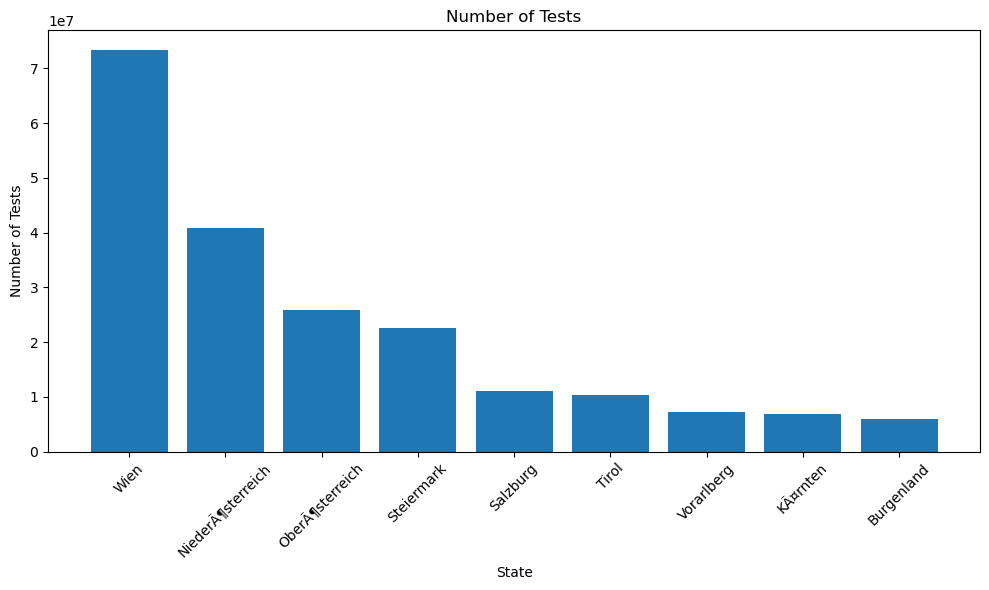

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
from neo4j import GraphDatabase
import numpy as np  

#Cypher query ausfuehren um die tests pro Bundesland zu erhalten
result = graph.run("""
MATCH (t:Tests) 
where t.BundeslandName <> 'Österreich'AND t.BundeslandName <> 'Ã–sterreich'
RETURN t.BundeslandName, t.Tests
ORDER BY t.Tests DESC
""")

#zu einem Dataframen umwandeln
df = pd.DataFrame([r.values() for r in result], columns=result.keys())

# fehlende Werte ersetzten mit 0 oder nan
df['t.BundeslandName'].replace({None: 'Unknown'}, inplace=True)
df['t.Tests'].replace({None: 0}, inplace=True)  # Replace with 0 or np.nan based on your preference

# Chart erstellen
plt.figure(figsize=(10, 6))
plt.bar(df['t.BundeslandName'], df['t.Tests'])
plt.xlabel('State')
plt.ylabel('Number of Tests')
plt.title('Number of Tests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* Wien hat fast doppelt so viele Tests gemacht wie Niederösterreich.
* Wien und Niederösterreich zusammen haben mehr Tests gemacht als der Rest zusammen.

Aber wie viele der allgemeinen Tests waren eigentlich positiv? Die hier dargestellten Werte sind nach Bundesland aufgeschlüsselt, um die Verteilung zu zeigen.

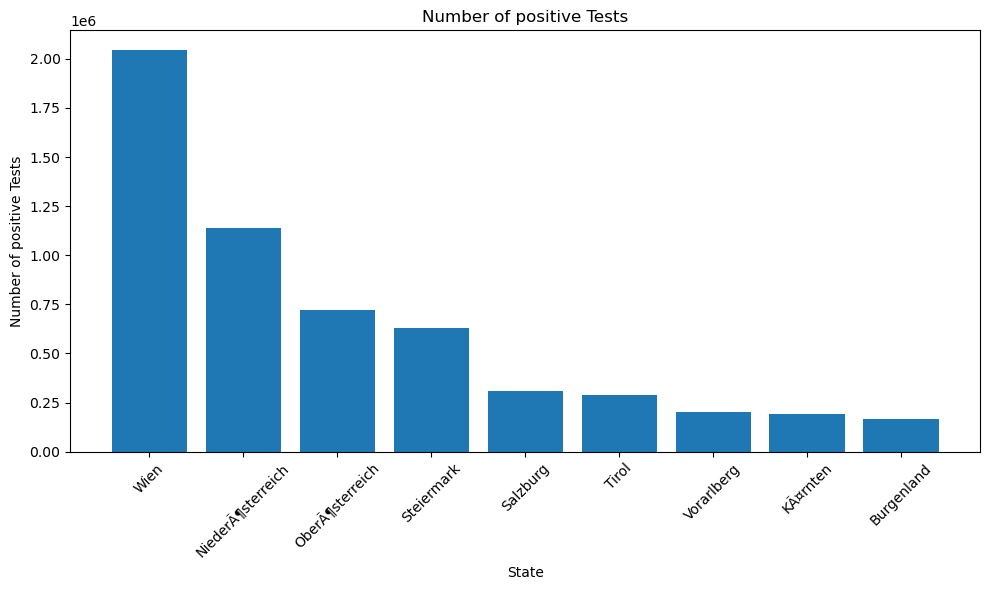

In [110]:
# Run Cypher query
result = graph.run("""
MATCH (t:Tests) 
where t.BundeslandName <> 'Österreich'AND t.BundeslandName <> 'Ã–sterreich'
RETURN t.BundeslandName, t.fällePositiv
ORDER BY t.fällePositiv DESC
""")

#zu einem Dataframen umwandeln
df = pd.DataFrame([r.values() for r in result], columns=result.keys())

# fehlende Werte ersetzten mit 0 oder nan
df['t.BundeslandName'].replace({None: 'Unknown'}, inplace=True)
df['t.fällePositiv'].replace({None: 0}, inplace=True)  # Replace with 0 or np.nan based on your preference

# Chart erstellen
plt.figure(figsize=(10, 6))
plt.bar(df['t.BundeslandName'], df['t.fällePositiv'])
plt.xlabel('State')
plt.ylabel('Number of positive Tests')
plt.title('Number of positive Tests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Wien hat fast doppelt so viele Tests gemacht wie Niederösterreich.
* Wien und Niederösterreich zusammen haben mehr Tests gemacht als der Rest zusammen.
* Aufgrund der großen Stichprobengröße sind die Graphen fast identisch.

Wie sehen die positiven Fälle im Vergleich zu den Impfungen aus? Corona wurde in allen Medien thematisiert und die genauen Zahlen wurden stets veröffentlicht. Aber wie verhält sich die Anzahl der Infektionen im Vergleich zu den Impfungen?

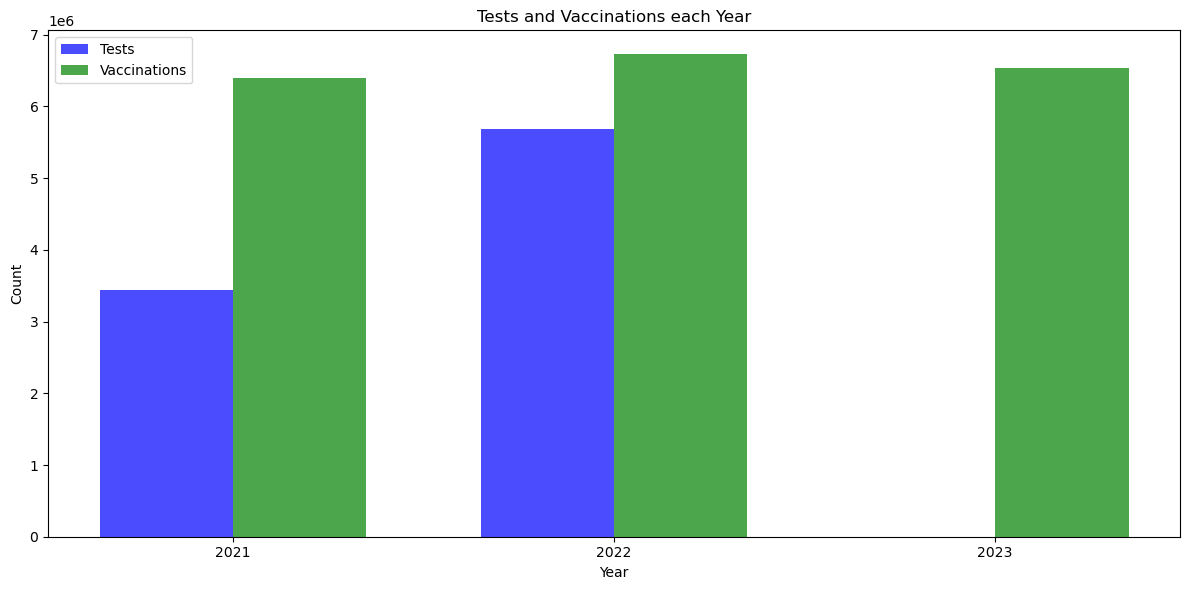

In [115]:

cypher_query = """
MATCH (n)
RETURN n.datum AS Year, max(n.fällePositiv) AS tests, sum(n.ersteImpfung) AS Vaccinations
ORDER BY Year
"""

with driver.session() as session:
    result = session.run(cypher_query)
    df = pd.DataFrame([dict(record) for record in result])

# Year numerischen Wert machen
df['Year'] = pd.to_numeric(df['Year'])

# subplots erstellen
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35

# Tests plotten
ax.bar(df['Year'] - bar_width/2, df['tests'], width=bar_width, color='b', alpha=0.7, label='Tests')
# Vaccinations Plotten
ax.bar(df['Year'] + bar_width/2, df['Vaccinations'], width=bar_width, color='g', alpha=0.7, label='Vaccinations')


ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.set_title("Tests and Vaccinations each Year")
ax.set_xticks(df['Year'])
ax.legend()
plt.tight_layout()
plt.show()


Erstaunlicherweise sind die Infektionen in beiden im Datensatz enthaltenen Jahren geringer als die Impfungen. Dies ist einerseits auf die Lockdowns zurückzuführen. Dies legt nahe, dass die Impfkampagnen eine entscheidende Rolle dabei gespielt haben könnten, die Ausbreitung des Virus einzudämmen und die Anzahl der Neuinfektionen zu verringern.

Wie viele der allgemeinen Tests waren eigentlich positiv in jedem Bundesland und wie hoch ist ihr prozentualer Anteil? Die hier dargestellten Werte sind nach Bundesland aufgeschlüsselt, um die Verteilung zu zeigen.

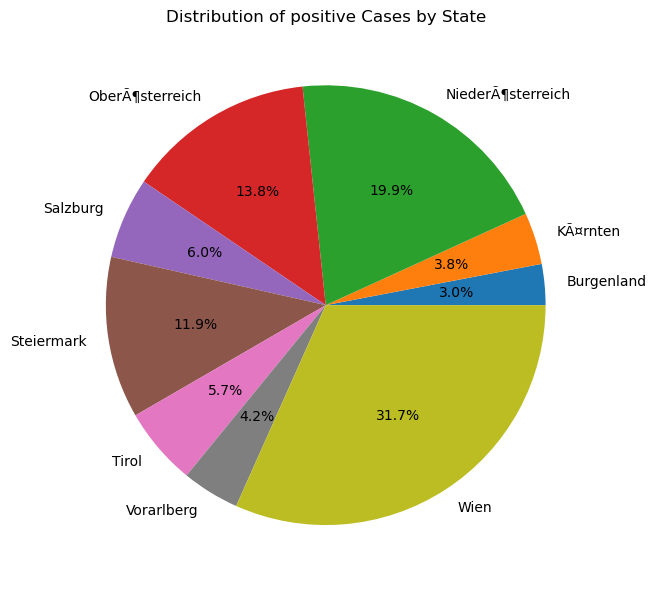

In [122]:
cypher_query = """
MATCH (t:Tests)
WHERE t.BundeslandName <> 'Österreich' AND t.BundeslandName <> 'Ã–sterreich'
RETURN t.BundeslandName, sum(t.fällePositiv) as Cases
"""

result = graph.run(cypher_query)

#zu einem Dataframen umwandeln
df = pd.DataFrame([dict(r) for r in result], columns=['t.BundeslandName', 'Cases'])

# leere werte ersetzten mit 0
df['t.BundeslandName'].replace({None: 'Unknown'}, inplace=True)
df['Cases'].replace({None: 0}, inplace=True)

# Create pie chart
plt.figure(figsize=(10, 6))
plt.pie(df['Cases'], labels=df['t.BundeslandName'], autopct='%1.1f%%')
plt.title('Distribution of positive Cases by State')
plt.tight_layout()
plt.show()



* Wien hat fast doppelt so viele Tests gemacht wie Niederösterreich.
* Wien und Niederösterreich zusammen hatten mehr positive Fälle als alle anderen Bundesländer zusammen.
* Wien allein hatte mehr als ein Viertel der positiven Fälle.
* Vorarlberg, Tirol, Burgenland und Salzburg hatten zusammen knapp 20 % der positiven Fälle.

In [ ]:
print(df.columns)

In [ ]:
cypher_query = """
MATCH (i:Impf_Patient)
RETURN i.datum AS Year, i.bezirkId AS opt,
       CASE WHEN i.datum CONTAINS '2021' THEN i.ersteImpfung + i.zweiteImpfung
            WHEN i.datum CONTAINS '2022' THEN i.ersteImpfung + i.zweiteImpfung + i.dritteImpfung + i.vierteImpfung + i.mehrAlsVier
            WHEN i.datum CONTAINS '2023' THEN i.ersteImpfung + i.zweiteImpfung + i.dritteImpfung + i.mehrAls3
       END as Vaccinations
"""


# Aus Datenbank abrufen
with driver.session() as session:
    result = session.run(cypher_query)
    df = pd.DataFrame([dict(record) for record in result])

# Bundesland von Bezirks-ID holen
df['bundesland'] = df['opt'].apply(lambda x: int(str(x)[0]))

# Pivotieren, damit Jahre als Spalten
df_pivot = df.pivot_table(index='bundesland', columns='Year', values='Vaccinations', aggfunc='sum')

# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['blue', 'orange', 'green']

bar_width = 0.2
for i, year in enumerate(df_pivot.columns):
    x = df_pivot.index + i * bar_width  # x-Koordinaten-Balken
    ax.bar(x, df_pivot[year], width=bar_width, label=year, color=colors[i % len(colors)])

ax.set_title('Verabreichte Impfdosen über Jahre nach Bundesland')
ax.set_xlabel('Bundesland')
ax.set_ylabel('Anzahl der Impfdosen')
ax.set_xticks(df_pivot.index + (len(df_pivot.columns) - 1) * bar_width / 2)
ax.set_xticklabels(['Burgenland', 'Kärnten', 'Niederösterreich', 'Oberösterreich',
                    'Salzburg', 'Steiermark', 'Tirol', 'Vorarlberg', 'Wien'])
ax.legend(title='Jahr')
plt.tight_layout()
plt.show()

Vom Jahr 2021 auf 2022 stieg die Anzahl der verabreichten Imfpdosen stark an. Im Jahr 2023 hingegen, wurde kaum noch geimpft.

In [ ]:
import plotly.graph_objs as go
import pandas as pd
import json


with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

Impf = graph.run("""
MATCH (i:Impf_Patient)
WHERE i.datum STARTS WITH '2021'
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC

""")


df = pd.DataFrame([dict(r) for r in Impf], columns=['bezirkId', 'TotalImpfungen'])


df['TotalImpfungen'] = pd.to_numeric(df['TotalImpfungen'])

# Create Choropleth Map
austriamap = [go.Choropleth(
    geojson=austria_geojson,  # Reference to your GeoJSON file
    featureidkey="properties.iso",  # Path to the 'iso' property in the GeoJSON that matches 'bezirkId'
    locations=df['bezirkId'],  # Names of the regions (make sure these match the GeoJSON)
    z=df['TotalImpfungen'],  # Data to be mapped
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften 2021 in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriere die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()


In [ ]:
import plotly.graph_objs as go
import pandas as pd
import json


with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

Impf = graph.run("""
MATCH (i:Impf_Patient)
WHERE i.datum STARTS WITH '2021'
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC

""")


df = pd.DataFrame([dict(r) for r in Impf])

population_data = {
    "1": 301966,
    "2": 569835,
    "3": 1723981,
    "4": 1530571,
    "5": 571528,
    "6": 1269945,
    "7": 776082,
    "8": 409951,
    "9": 2006134
}


df['Population'] = df['bezirkId'].apply(lambda x: population_data.get(x))


df['CasesPerCapita'] = df['TotalImpfungen'] / df['Population']

# Create Choropleth Map
austriamap = [go.Choropleth(
    geojson=austria_geojson,  
    featureidkey="properties.iso",  
    locations=df['bezirkId'], 
    z=df['CasesPerCapita'],  
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften 2021 in Österreich nach Bundesländern pro Einwohner",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  
        lataxis={"range": [46, 49]},  
        lonaxis={"range": [9, 17]},  
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()


In [ ]:
import plotly.graph_objs as go
import pandas as pd
import json


with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

Impf = graph.run("""
MATCH (i:Impf_Patient)
WHERE i.datum STARTS WITH '2022'
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC
""")


df = pd.DataFrame([dict(r) for r in Impf], columns=['bezirkId', 'TotalImpfungen'])


df['TotalImpfungen'] = pd.to_numeric(df['TotalImpfungen'])

# Create Choropleth Map
austriamap = [go.Choropleth(
    geojson=austria_geojson,  # Reference to your GeoJSON file
    featureidkey="properties.iso",  # Path to the 'iso' property in the GeoJSON that matches 'bezirkId'
    locations=df['bezirkId'],  # Names of the regions (make sure these match the GeoJSON)
    z=df['TotalImpfungen'],  # Data to be mapped
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften 2022 in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriere die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)


fig = go.Figure(data=austriamap, layout=layout)
fig.show()


In [ ]:
import plotly.graph_objs as go
import pandas as pd
import json


with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

Impf = graph.run("""
MATCH (i:Impf_Patient)
WHERE i.datum STARTS WITH '2022'
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC

""")


df = pd.DataFrame([dict(r) for r in Impf])

population_data = {
    "1": 301966,
    "2": 569835,
    "3": 1723981,
    "4": 1530571,
    "5": 571528,
    "6": 1269945,
    "7": 776082,
    "8": 409951,
    "9": 2006134
}


df['Population'] = df['bezirkId'].apply(lambda x: population_data.get(x))


df['CasesPerCapita'] = df['TotalImpfungen'] / df['Population']

# Create Choropleth Map
austriamap = [go.Choropleth(
    geojson=austria_geojson,  
    featureidkey="properties.iso",  
    locations=df['bezirkId'], 
    z=df['CasesPerCapita'],  
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften 2022 in Österreich nach Bundesländern pro Einwohner",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  
        lataxis={"range": [46, 49]},  
        lonaxis={"range": [9, 17]},  
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()


In [ ]:
import plotly.graph_objs as go
import pandas as pd
import json


with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

Impf = graph.run("""
MATCH (i:Impf_Patient)
WHERE i.datum STARTS WITH '2023'
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC

""")


df = pd.DataFrame([dict(r) for r in Impf], columns=['bezirkId', 'TotalImpfungen'])


df['TotalImpfungen'] = pd.to_numeric(df['TotalImpfungen'])

# Create Choropleth Map
austriamap = [go.Choropleth(
    geojson=austria_geojson,  # Reference to your GeoJSON file
    featureidkey="properties.iso",  # Path to the 'iso' property in the GeoJSON that matches 'bezirkId'
    locations=df['bezirkId'],  # Names of the regions (make sure these match the GeoJSON)
    z=df['TotalImpfungen'],  # Data to be mapped
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften 2023 in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriere die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)


fig = go.Figure(data=austriamap, layout=layout)
fig.show()


In [ ]:
import plotly.graph_objs as go
import pandas as pd
import json


with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

Impf = graph.run("""
MATCH (i:Impf_Patient)
WHERE i.datum STARTS WITH '2023'
WITH i, substring(i.bezirkId, 0, 1) AS bundeslandId
RETURN bundeslandId AS bezirkId, sum(i.zweiteImpfung) AS TotalImpfungen
ORDER BY TotalImpfungen DESC

""")


df = pd.DataFrame([dict(r) for r in Impf])

population_data = {
    "1": 301966,
    "2": 569835,
    "3": 1723981,
    "4": 1530571,
    "5": 571528,
    "6": 1269945,
    "7": 776082,
    "8": 409951,
    "9": 2006134
}


df['Population'] = df['bezirkId'].apply(lambda x: population_data.get(x))


df['CasesPerCapita'] = df['TotalImpfungen'] / df['Population']

# Create Choropleth Map
austriamap = [go.Choropleth(
    geojson=austria_geojson,  
    featureidkey="properties.iso",  
    locations=df['bezirkId'], 
    z=df['CasesPerCapita'],  
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der Geimpften"
)]

layout = go.Layout(
    title_text="Anzahl der Geimpften 2023 in Österreich nach Bundesländern pro Einwohner",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  
        lataxis={"range": [46, 49]},  
        lonaxis={"range": [9, 17]},  
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()


Ein allgemeiner Überblick über die positiven Fälle pro Bundesland:

In [ ]:
Test = graph.run("""
MATCH (t:Tests)
WHERE t.BundeslandName <> 'Österreich' AND t.BundeslandName <> 'Ã–sterreich'
WITH t.BundeslandID as BundeslandID, toInteger(t.fällePositiv) as TotalCases, t.BundeslandName as Name
ORDER BY t.datum DESC
RETURN BundeslandID, Name, TotalCases
LIMIT 9
""")

for record in Test:
    print(record)

In [ ]:
import plotly.graph_objs as go
import pandas as pd
import json


with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)


Test = graph.run("""
MATCH (t:Tests)
WHERE t.BundeslandName <> 'Österreich' AND t.BundeslandName <> 'Ã–sterreich'
WITH t.BundeslandID as BundeslandID, toInteger(t.fällePositiv) as TotalCases, t.BundeslandName as Name
ORDER BY t.datum DESC
RETURN BundeslandID, Name, TotalCases
LIMIT 9
""")

df = pd.DataFrame([dict(r) for r in Test], columns=['BundeslandID', 'TotalCases'])

austriamap = [go.Choropleth(
    geojson=austria_geojson,  
    featureidkey="properties.iso",  
    locations=df['BundeslandID'],  
    z=df['TotalCases'],  
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der positiven Fälle"
)]

layout = go.Layout(
    title_text="Anzahl der positiven Fälle in Österreich nach Bundesländern",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  # Zentriere die Karte auf Österreich
        lataxis={"range": [46, 49]},  # Begrenzt den Breitengradbereich
        lonaxis={"range": [9, 17]},  # Begrenzt den Längengradbereich
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()

In [ ]:
import plotly.graph_objs as go
import pandas as pd
import json


with open('laender_999_geo.json', 'r') as f:
    austria_geojson = json.load(f)

Test = graph.run("""
MATCH (t:Tests)
WHERE t.BundeslandName <> 'Österreich' AND t.BundeslandName <> 'Ã–sterreich'
WITH t.BundeslandID as BundeslandID, toInteger(t.fällePositiv) as TotalCases, t.BundeslandName as Name
ORDER BY t.datum DESC
RETURN BundeslandID, Name, TotalCases
LIMIT 9
""")


df = pd.DataFrame([dict(r) for r in Test])

population_data = {
    "1": 301966,
    "2": 569835,
    "3": 1723981,
    "4": 1530571,
    "5": 571528,
    "6": 1269945,
    "7": 776082,
    "8": 409951,
    "9": 2006134
}


df['Population'] = df['BundeslandID'].apply(lambda x: population_data.get(x))


df['CasesPerCapita'] = df['TotalCases'] / df['Population']

# Create Choropleth Map
austriamap = [go.Choropleth(
    geojson=austria_geojson,  
    featureidkey="properties.iso",  
    locations=df['BundeslandID'], 
    z=df['CasesPerCapita'],  
    colorscale="Blues",
    marker_line_width=0.5,
    colorbar_title="Anzahl der positiven Fälle"
)]

layout = go.Layout(
    title_text="Anzahl der positiven Fälle in Österreich nach Bundesländern pro Einwohner",
    geo=dict(
        scope="europe",  # Begrenzt die Ansicht auf Europa
        showlakes=True,
        lakecolor="rgb(255, 255, 255)",
        center={"lat": 47.6965, "lon": 13.3457},  
        lataxis={"range": [46, 49]},  
        lonaxis={"range": [9, 17]},  
        countrycolor="DarkBlue",
        landcolor="White",
        showcountries=True,
        countrywidth=1.0
    ),
    width=1000,
    height=600
)

fig = go.Figure(data=austriamap, layout=layout)
fig.show()


Um abzufragen, wie viele Nodes in Der Tabelle sind, kann diese Query verwendet werden:

In [ ]:
with driver.session() as session:
    result = session.run("MATCH (n) RETURN count(n) AS node_count")
    for record in result:
        print(record["node_count"])

Zuletzt wird noch ein Scatterplot erstellt, um zu überprüfen, ob es eine Abhängigkeit zwischen den Impfungen und Infektionen gibt und ob sich diese aufeinander auswirken.

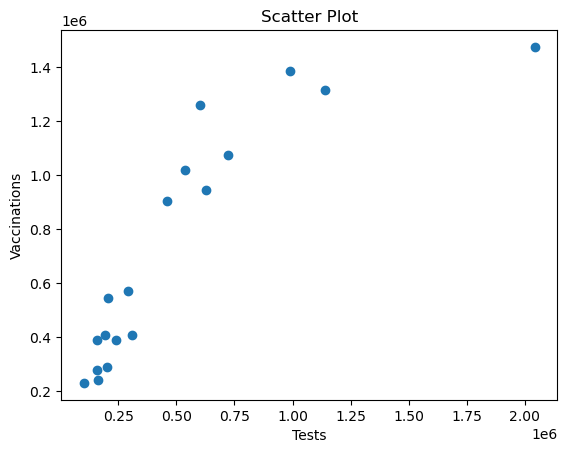

In [123]:
cypher_query = """
MATCH (n)
WITH n, substring(n.bezirkId, 0, 1) AS bundeslandId
WHERE NOT(n.BundeslandID CONTAINS '10') OR NOT(bundeslandId CONTAINS '10')
RETURN n.datum AS Year, COALESCE(bundeslandId, '') + COALESCE(n.BundeslandID, '') AS BundeslandID, max(n.`fällePositiv`) AS tests, sum(n.ersteImpfung) AS Vaccinations
ORDER BY Year, BundeslandID
"""

with driver.session() as session:
    result = session.run(cypher_query)
    df = pd.DataFrame([dict(record) for record in result])

# Create scatter plot
plt.scatter(df['tests'], df['Vaccinations'])

# Add labels and title
plt.xlabel('Tests')
plt.ylabel('Vaccinations')
plt.title('Scatter Plot')

# Show plot
plt.show()


Im nächsten Abschnitt werden MapReduce-Calculations durchgeführt. Sie geben einen guten abschließenden, allgemeinen Überblick über die Impfdaten. Anschließend werden sie nochmals in einer Grafik dargestellt: 

### MapReduce-Calculations

### Anzahl der Impfungen bis 2021:

In [ ]:
csv_filename = 'impfungen_2021.csv'

bundesland_names = {
    1: 'Burgenland',
    2: 'Kärnten',
    3: 'Niederösterreich',
    4: 'Oberösterreich',
    5: 'Salzburg',
    6: 'Steiermark',
    7: 'Tirol',
    8: 'Vorarlberg',
    9: 'Wien'
}

# Map
data_2021 = []       # Liste

# CSV-File lesen
with open(csv_filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        bundesland_id = int(row['Gemeindecode'][0])  # Extract the first digit of Gemeindecode
        teilgeimpfte = int(row['Teilgeimpfte'])
        vollimmunisierte = int(row['Vollimmunisierte'])
        data_2021.append((bundesland_names[bundesland_id], teilgeimpfte + vollimmunisierte))  # Store the sum of teilgeimpfte and vollimmunisierte

    # Demonstrationszwecke

print("Die ersten 5 Schlüsselwertpaare aus Liste ausgeben:")
print()

for item in data_2021[:5]:
    print(item)

print()


# Shuffle Reduce
result_2021 = {}               # Dictionary

# Aggregieren pro Bundesland
for bundesland_name, summe in data_2021:
    if bundesland_name in result_2021:
        result_2021[bundesland_name] += summe
    else:
        result_2021[bundesland_name] = summe

# Finaler Output
print("Dictionary nach Shuffle und Reduce:")
print()

for bundesland_name, summe in result_2021.items():
    print(f'{bundesland_name} {summe}')

print()
print("Als Pandas Dataframe:")
print()
df = pd.DataFrame(list(result_2021.items()), columns=['Bundesland:', 'Summe:'])
print(df)

# Data saven
data_2021_save = result_2021.copy()


### Anzahl der Impfungen bis 2022:

In [ ]:
csv_filename = 'impfungen_2022.csv'

bundesland_names = {
    1: 'Burgenland',
    2: 'Kärnten',
    3: 'Niederösterreich',
    4: 'Oberösterreich',
    5: 'Salzburg',
    6: 'Steiermark',
    7: 'Tirol',
    8: 'Vorarlberg',
    9: 'Wien'
}

# Map
data_2022 = []      # Liste

# CSV-File lesen
with open(csv_filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        bundesland_id = int(row['municipality_id'][0])  # Extract the first digit of Gemeindecode
        dose1 = int(row['dose_1'])
        dose2 = int(row['dose_2'])
        dose3 = int(row['dose_3'])
        dose4 = int(row['dose_4'])
        dose5 = int(row['dose_5+'])
        data_2022.append((bundesland_names[bundesland_id], dose1 + dose2 + dose3 + dose4 + dose5))  # Store the sum of teilgeimpfte and vollimmunisierte


    # Demonstrationszwecke

print("Die ersten 5 Schlüsselwertpaare aus Liste ausgeben:")
print()

for item in data_2022[:5]:
    print(item)

print()


# Shuffle Reduce
result_2022 = {}      # Dictionary

for bundesland_name, summe in data_2022:
    if bundesland_name in result_2022:
        result_2022[bundesland_name] += summe
    else:
        result_2022[bundesland_name] = summe

# Finaler Output
print("Dictionary nach Shuffle und Reduce:")
print()

for bundesland_name, summe in result_2022.items():
    print(f'{bundesland_name} {summe}')

print()
print("Als Pandas Dataframe:")
print()
df = pd.DataFrame(list(result_2022.items()), columns=['Bundesland:', 'Summe:'])
print(df)

# Data saven
data_2022_save = result_2022.copy()


### Anzahl der Impfungen bis 2023:

In [ ]:
csv_filename = 'impfungen_2023.csv'

bundesland_names = {
    1: 'Burgenland',
    2: 'Kärnten',
    3: 'Niederösterreich',
    4: 'Oberösterreich',
    5: 'Salzburg',
    6: 'Steiermark',
    7: 'Tirol',
    8: 'Vorarlberg',
    9: 'Wien'
}

# Map
data_2023 = []                 # Liste

    # CSV-File lesen
with open(csv_filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        bundesland_id = int(row['municipality_id'][0])  # Extract the first digit of Gemeindecode
        dose1 = int(row['vaccination_1'])
        dose2 = int(row['vaccination_2'])
        dose3 = int(row['vaccination_3'])
        dose4 = int(row['vaccination_4+'])
        
        data_2023.append((bundesland_names[bundesland_id], dose1 + dose2 + dose3 + dose4))  # Store the sum of teilgeimpfte and vollimmunisierte


    # Demonstrationszwecke

print("Die ersten 5 Schlüsselwertpaare aus Liste ausgeben:")
print()

for item in data_2023[:5]:
    print(item)

print()



# Shuffle und Reduce
result_2023 = {}       # Dictionary

for bundesland_name, summe in data_2023:
    if bundesland_name in result_2023:
        result_2023[bundesland_name] += summe
    else:
        result_2023[bundesland_name] = summe

# Finaler Output
print("Dictionary nach Shuffle und Reduce:")
print()

for bundesland_name, summe in result_2023.items():
    print(f'{bundesland_name} {summe}')

print()
print("Als Pandas Dataframe:")
print()
df = pd.DataFrame(list(result_2023.items()), columns=['Bundesland:', 'Summe:'])
print(df)

# Data saven
data_2023_save = result_2023.copy()


In [ ]:
combined_data = {}

for bundesland_name in bundesland_names.values():     # für jedes bundesland (key) wird folgendes value eingespeichert: Jahre als keys und data_xxxx_save als value
    combined_data[bundesland_name] = {
        '2021': data_2021_save.get(bundesland_name, 0),
        '2022': data_2022_save.get(bundesland_name, 0),
        '2023': data_2023_save.get(bundesland_name, 0)
    }


plt.figure(figsize=(12, 6))

colors = ['blue', 'orange', 'green']
bar_width = 0.2

for j, year in enumerate(['2021', '2022', '2023']):    # enumerate gibt index und wert zurück
    x_values = []
    y_values = []
    for i, (bundesland, year_data) in enumerate(combined_data.items()):
        x_values.append(i + j * bar_width)
        y_values.append(year_data.get(year, 0))

    plt.bar(x_values, y_values, width=bar_width, color=colors[j])

plt.title('Verabreichte Impfdosen über Jahre nach Bundesland')
plt.xlabel('Bundesland')
plt.ylabel('Anzahl der Impfdosen')
plt.xticks(np.arange(len(combined_data)) + (len(year_data) - 1) * bar_width / 2, combined_data.keys())
plt.tight_layout()
plt.show()


Mithilfe der MapReduce-Calculations konnten die gleichen Ergebnisse erziehlt werden.

#  Aufräumen:

Es werden alle container angezeigt

In [ ]:
!docker ps

Danach wird der Container wieder geschlossen:

In [ ]:
!docker-compose -p project_neo4j down

In [ ]:
!docker volume ls

Um ein Volume zu löschen, kann man wieder folgenden Befehl verwenden:

In [ ]:
!docker volume rm project_neo4j_neo4j-data